# Kalorimetrie Laborversuch

Author: Noah Michel

Datum: 15.12.2023

Gruppe: 18

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.
- Welcher Einfluss hat die Masse und das Material auf die Wärme Kapazität?


## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Nutzen Sie hier Ihr eigenes Bild.


<img src="figures/kalorimetrie_pruefstand.jpg" width="800">


## Versuchsauswertung

In [24]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")

### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [25]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = "data/calorimetry_constant/calorimetry_constant.h5"

# DONE #

In [26]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const, "RawData")

# DONE #

In [27]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

index_calorimeter = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_calorimeter' in name]
index_environment = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_environment' in name]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [28]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.

data_mean_and_standard_calorimeter = []
data_mean_and_standard_environment = []


for i in index_calorimeter:
    data_mean_and_standard_calorimeter.append(data_dict["temperature"][i])
    
for i in index_environment:
    data_mean_and_standard_environment.append(data_dict["temperature"][i])

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_mean_and_standard_calorimeter)
mean_std_environment = utility.cal_mean_and_standard_deviation(data_mean_and_standard_environment)

# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

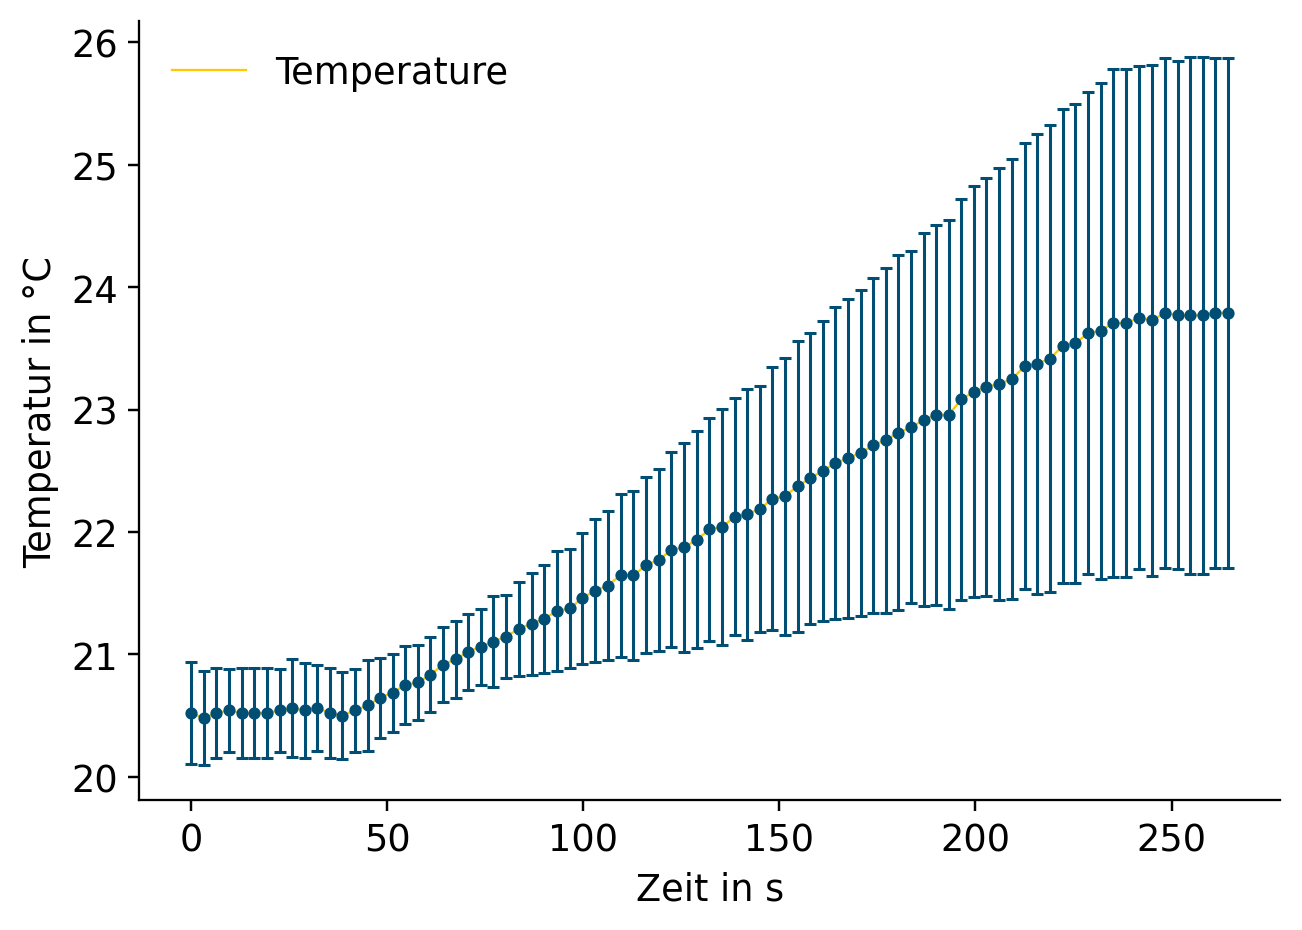

In [29]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting

time = data_dict["timestamp"][index_calorimeter[0]]
utility.plot_temp_over_time([mean_std_calorimeter], [time - time[0]], ["Temperature"], "Zeit in s","Temperatur in °C")

# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [30]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.

water_mass = m_json.get_json_entry("datasheets", "1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753", ["calorimeter", "medium", "mass", "value"])

# DONE #

In [31]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.
with h5.File(datafile_path_const, "r") as f:
    current = f["RawData/1ee21744-0355-6023-94b4-d5c041dd32cd/current"][()]
    heat_time = f["RawData/1ee21744-0355-6023-94b4-d5c041dd32cd/heat_time"][()]
    voltage = f["RawData/1ee21744-0355-6023-94b4-d5c041dd32cd/voltage"][()]

# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [32]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_end, temperature_start = utility.get_start_end_temperature(data_mean_and_standard_calorimeter) 

# DONE #

#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [33]:
# TODO: Calculate heat capacity of the calorimeter

calorimeter_const = (voltage*current*heat_time)/(temperature_end-temperature_start)

# DONE #

#### (Vii) Ergebnis

In [34]:
calorimeter_const

1582.4175824175825

### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [35]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = "data/PDC004/PDC004.h5"

# DONE #

In [36]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1, "RawData")

# DONE #

In [37]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_calorimeter' in name]
index_bath = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_hot_water_bath' in name]
index_env = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_environment' in name]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [38]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.
data_mean_and_standard_calorimeter = []
data_mean_and_standard_environment = []
data_mean_and_standard_heater = []


for i in index_calorimeter:
    data_mean_and_standard_calorimeter.append(data_dict["temperature"][i])
    
for i in index_environment:
    data_mean_and_standard_environment.append(data_dict["temperature"][i])
    
for i in index_bath:
    data_mean_and_standard_heater.append(data_dict["temperature"][i])

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_mean_and_standard_calorimeter)
mean_std_environment = utility.cal_mean_and_standard_deviation(data_mean_and_standard_environment)
mean_std_heater = utility.cal_mean_and_standard_deviation(data_mean_and_standard_heater)

# DONE #

#### (iii) Daten ploten

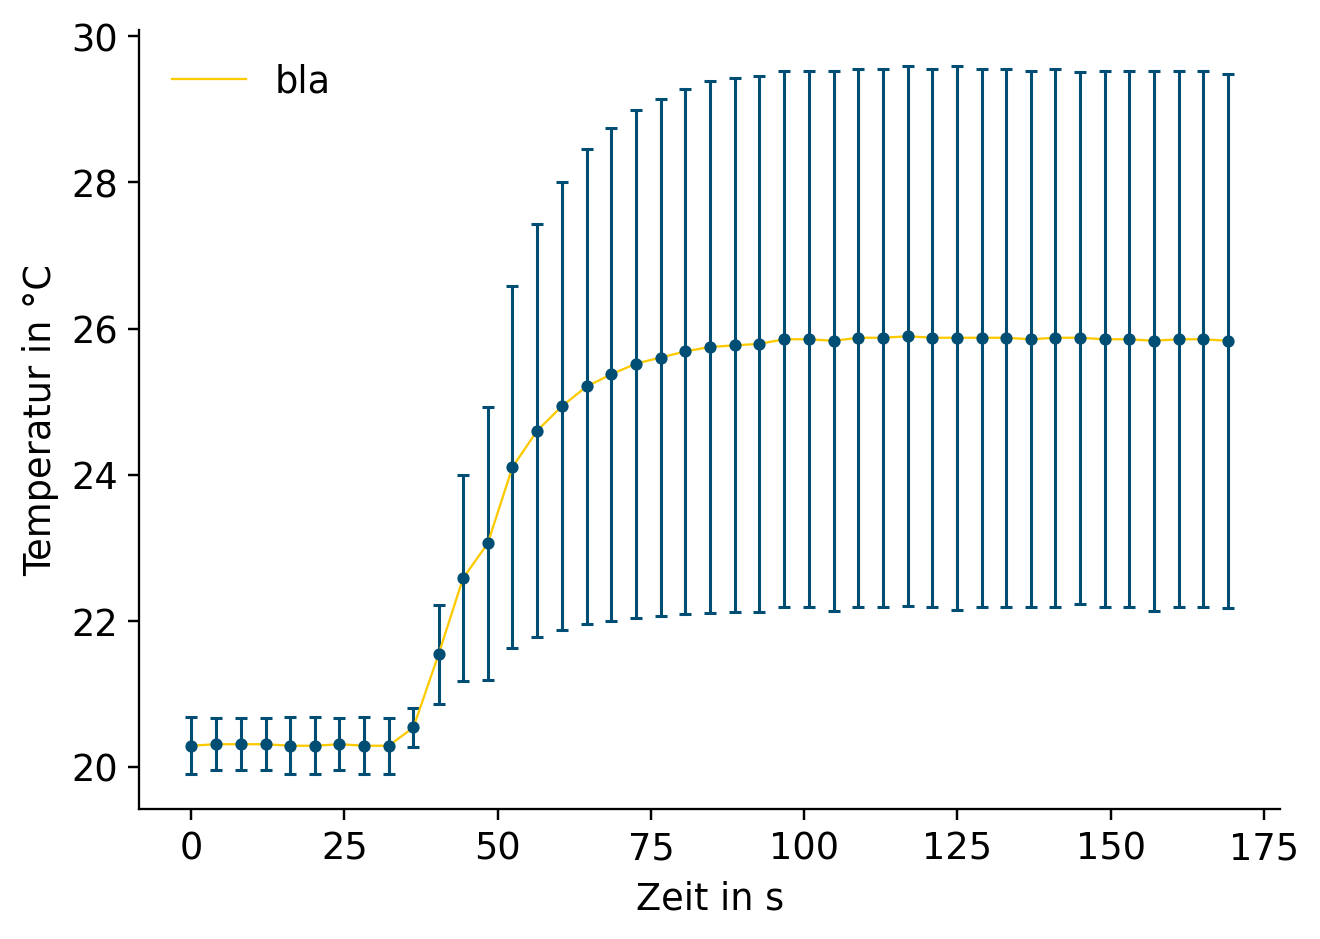

In [39]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

time = data_dict["timestamp"][index_calorimeter[0]]
utility.plot_temp_over_time([mean_std_calorimeter], [time - time[0]],["bla"],"Zeit in s","Temperatur in °C")

# DONE #

#### (iv) Metadaten auslesen

In [40]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass = m_json.get_json_entry("datasheets", "1ee57b2f-bfd6-6c0e-a6ed-d099248c61ab", ["probe", "mass", "value"])

# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [41]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_end, temperature_start = utility.get_start_end_temperature(data_mean_and_standard_calorimeter) 

print(temperature_end, temperature_start)

# DONE #

28.875 19.75


In [42]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

temperature_start_sample = np.mean(data_mean_and_standard_heater[:10])
print(temperature_start_sample)


# DONE #

80.48691860465117


#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [43]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = ((water_heat_capa*(temperature_end-temperature_start))/(sample_mass*(temperature_start_sample-temperature_end)))
# DONE #

#### (Vii) Ergebnis

In [44]:
sample_heat_capa

0.001160164891532794

### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [45]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = "data/PDC012/PDC012.h5"

# DONE #

In [46]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2, "RawData")

# DONE #

In [47]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_calorimeter' in name]
index_bath = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_hot_water_bath' in name]
index_env = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_environment' in name]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [48]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.
data_mean_and_standard_calorimeter = []
data_mean_and_standard_environment = []
data_mean_and_standard_heater = []


for i in index_calorimeter:
    data_mean_and_standard_calorimeter.append(data_dict["temperature"][i])
    
for i in index_environment:
    data_mean_and_standard_environment.append(data_dict["temperature"][i])
    
for i in index_bath:
    data_mean_and_standard_heater.append(data_dict["temperature"][i])

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_mean_and_standard_calorimeter)
mean_std_environment = utility.cal_mean_and_standard_deviation(data_mean_and_standard_environment)
mean_std_heater = utility.cal_mean_and_standard_deviation(data_mean_and_standard_heater)
# DONE #

#### (iii) Daten ploten

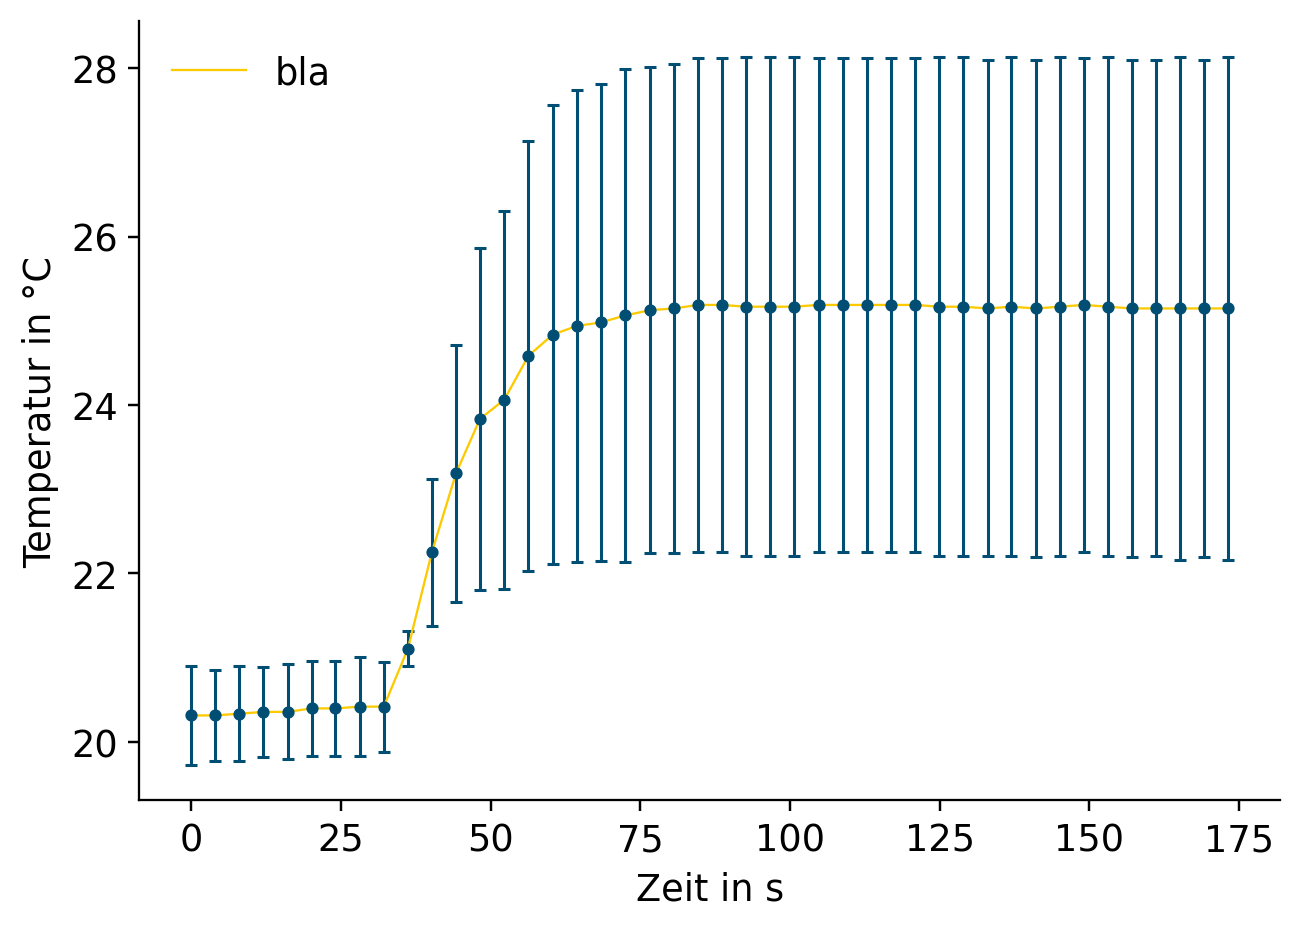

In [49]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

time = data_dict["timestamp"][index_calorimeter[0]]
utility.plot_temp_over_time([mean_std_calorimeter], [time - time[0]], ["bla"], "Zeit in s", "Temperatur in °C")

# DONE #

#### (iv) Metadaten auslesen

In [50]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass = m_json.get_json_entry("datasheets", "1ee57b38-1b08-63da-8b38-63a271236a0b", ["probe", "mass", "value"])

# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [51]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_end, temperature_start = utility.get_start_end_temperature(data_mean_and_standard_calorimeter) 

# DONE #

In [52]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(data_mean_and_standard_heater[:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [53]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (water_heat_capa*(temperature_end-temperature_start))/(sample_mass*(temperature_start_sample-temperature_end))

# DONE #

#### (Vii) Ergebnis

In [54]:
sample_heat_capa

0.0009157591358106173

### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [55]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = "data/PDC030/PDC030.h5"

# DONE #

In [56]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3, "RawData")

# DONE #

In [57]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_calorimeter' in name]
index_bath = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_hot_water_bath' in name]
index_env = [i for  i,name in enumerate(data_dict["name"]) if 'temperature_environment' in name]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [58]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

data_mean_and_standard_calorimeter = []
data_mean_and_standard_environment = []
data_mean_and_standard_heater = []


for i in index_calorimeter:
    data_mean_and_standard_calorimeter.append(data_dict["temperature"][i])
    
for i in index_environment:
    data_mean_and_standard_environment.append(data_dict["temperature"][i])
    
for i in index_bath:
    data_mean_and_standard_heater.append(data_dict["temperature"][i])

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_mean_and_standard_calorimeter)
mean_std_environment = utility.cal_mean_and_standard_deviation(data_mean_and_standard_environment)
mean_std_heater = utility.cal_mean_and_standard_deviation(data_mean_and_standard_heater)

# DONE #

#### (iii) Daten ploten

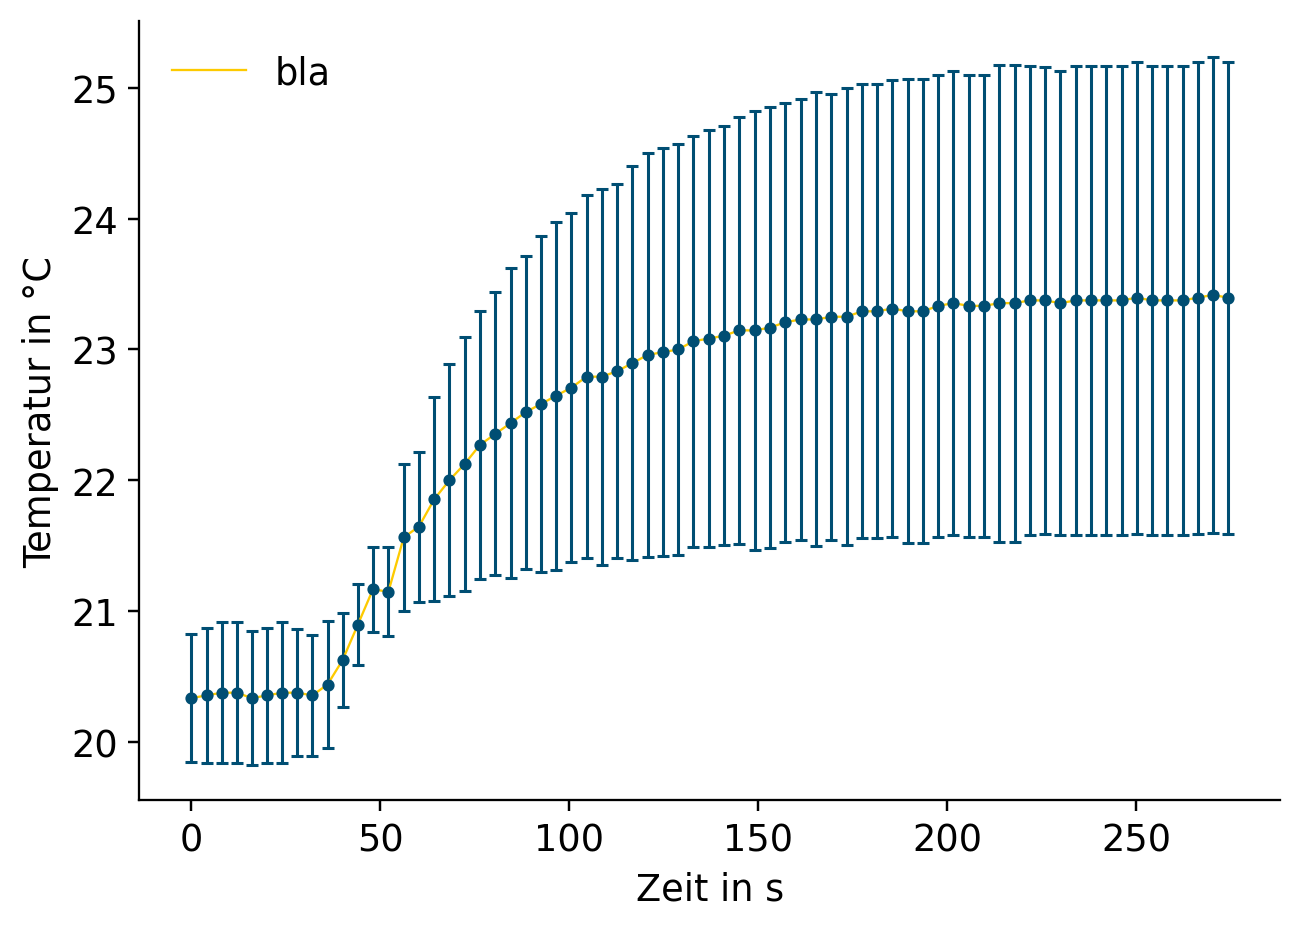

In [59]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

time = data_dict["timestamp"][index_calorimeter[0]]
utility.plot_temp_over_time([mean_std_calorimeter], [time - time[0]],["bla"],"Zeit in s","Temperatur in °C")

# DONE #

#### (iv) Metadaten auslesen

In [60]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass = m_json.get_json_entry("datasheets", "1ee7d44e-01cd-6c7e-9bef-cdb0fb992ba6", ["probe", "mass", "value"])

# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [61]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_end, temperature_start = utility.get_start_end_temperature(data_mean_and_standard_calorimeter) 

# DONE #

In [62]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(data_mean_and_standard_heater[:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [63]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (water_heat_capa*(temperature_end-temperature_start))/(sample_mass*(temperature_start_sample-temperature_end))

# DONE #

#### (Vii) Ergebnis

In [64]:
sample_heat_capa

0.004405608118045003

## Diskussion
Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage. Wie wirkt sich die mit der Probe aus dem Heißwasserbad transportierte Wassermenge auf das Ergebnis aus? Welche weiteren Fehlerquellen gibt es?

PDC004 Edelstahl, Masse 637, Wärmekapazität = 0.001160164891532794
PDC012 Messing, Masse 695, Wärmekapazität = 0.0009157591358106173
PDC030 PA_6_6, Masse 92, Wärmekapazität = 0.004405608118045003

Wie man in der Formel zur berechnung zur Wärmekapazität bereits erkennen kann, ist die Masse der Probe ein etscheidender Faktor. Deswegen hat die Leichteste Probe auch die höchste Wärmekapazität. Natürlich ist das Material auch entscheidend da dieses bestimmt wie schnell die Probe Wärme aufnähmen kann.

Da wir bei zwei von den Proben kein Wasser verloren hatten und bei der dritten nur 1 Gramm ist dieser Fehler vernachlässigbar klein.

Ein weitere Fehlerquelle konnte z.B. sein wenn man das Wasser nicht rührt oder wenn der Behelter nicht richtig verschlossen wird.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

In [ ]:
Der Küchentischversuch hat mir bereits gezeigt wie man die Wärmekapazität berechnet. Der Laborversuch und die Auswertung desen 
Ergebnisse hat mich aber noch ein bisschen weiter gebracht, da ich gelernt habe wie diese Versuche durchgeführt werden und wie
man mit dem Laboraparaten umzugehen hat.